In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [170]:
data=pd.read_csv("/content/Titanic-Dataset.csv")

In [171]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [172]:
data.info()
          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [173]:
data.drop(["Name","PassengerId", "Ticket","Cabin"],axis=1,inplace=True)

In [174]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [175]:
data.isna().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

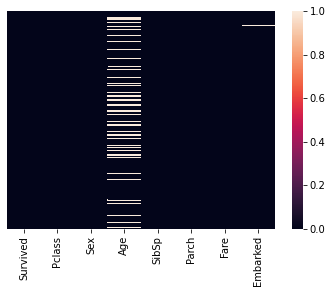

In [176]:
sns.heatmap(data.isnull(),yticklabels=False)

In [177]:
data.shape

(891, 8)

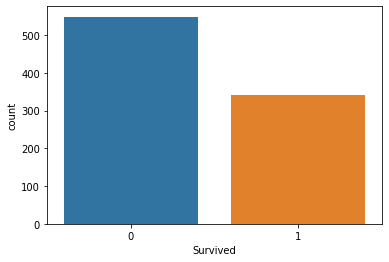

In [178]:
#number of servivers and non-servivers
sns.countplot(x="Survived",data=data)

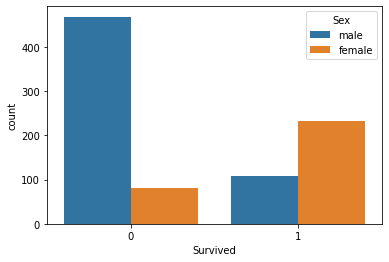

In [179]:
sns.countplot(x="Survived",hue="Sex",data=data)

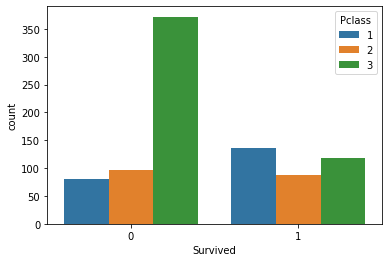

In [180]:
sns.countplot(x="Survived",hue="Pclass",data=data)

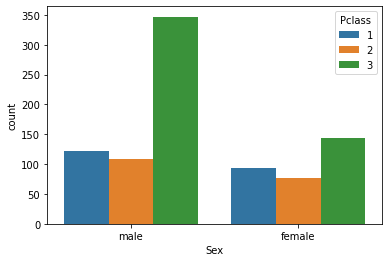

In [181]:
sns.countplot(x="Sex",hue="Pclass",data=data)

In [182]:
data.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [183]:
data.dropna(inplace=True)

In [184]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [186]:
data.shape

(712, 8)

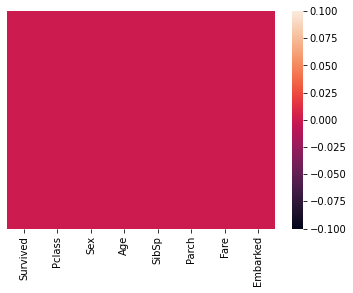

In [187]:
#no null value
sns.heatmap(data.isnull(),yticklabels=False)


In [188]:
# label Encoding

In [189]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [190]:
emb=pd.get_dummies(data['Embarked'],drop_first=True)

In [191]:
pclass=pd.get_dummies(data['Pclass'],drop_first=True)

In [192]:
data=pd.concat([data,sex,emb,pclass],axis=1)

In [193]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S,2,3
0,0,3,male,22.0,1,0,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,0,0
4,0,3,male,35.0,0,0,8.0500,S,1,0,1,0,1


In [194]:
data.drop(['Sex','Pclass','Embarked'],axis=1,inplace=True)

In [195]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [196]:
data.shape

(712, 10)

In [197]:
data['Age']=data['Age'].astype('int64')
data['Fare']=data['Fare'].astype('int64')
data['male']=data['male'].astype('int64')
data['Q']=data['Q'].astype('int64')
data['S']=data['S'].astype('int64')
data[2]=data[2].astype('int64')
data[3]=data[3].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  712 non-null    int64
 1   Age       712 non-null    int64
 2   SibSp     712 non-null    int64
 3   Parch     712 non-null    int64
 4   Fare      712 non-null    int64
 5   male      712 non-null    int64
 6   Q         712 non-null    int64
 7   S         712 non-null    int64
 8   2         712 non-null    int64
 9   3         712 non-null    int64
dtypes: int64(10)
memory usage: 61.2 KB


In [198]:
from sklearn.model_selection import train_test_split

In [199]:
x= data.drop("Survived",axis=1)
y=data['Survived']

In [200]:
print(x.shape)
print(y.shape)

(712, 9)
(712,)


In [201]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [202]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()

log_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [203]:
prediction=log_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [204]:
from sklearn.metrics import classification_report
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.89      0.84        83\n           1       0.82      0.68      0.75        60\n\n    accuracy                           0.80       143\n   macro avg       0.81      0.79      0.79       143\nweighted avg       0.81      0.80      0.80       143\n'

In [205]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,prediction)

array([[74,  9],
       [19, 41]])

In [206]:
((80+35)/(80+15+13+35))*100

80.41958041958041